<a href="https://colab.research.google.com/github/siddhartha237/Pythonweek-1/blob/main/Live_session_1_Data_Analytics_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = '/content/gapminder-FiveYearData.csv'
df = pd.read_csv(path)
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [ ]:
df.shape

(1704, 6)

In [ ]:
df = pd.read_csv(path, header=0)
df.head(20)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


## Check whether all countries have data for the same years
* Given no year is repeated

In [ ]:
df['year'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: year, Length: 1704, dtype: bool

In [ ]:
df['year'].isna().sum()

0

In [ ]:
df['year'].nunique()

12

In [ ]:
df['year'].nunique() == df[df['country'] == 'Afghanistan']['year'].nunique()

True

In [ ]:
df['year'].nunique() == df[df['country'] == 'Afghanistan']['year'].nunique()

True

In [ ]:
total_unique = df['year'].nunique()

# iterate over all the years
for country in df['country']:
  # check for unique elements
  if total_unique != df[df['country'] == country]['year'].nunique():
    print('Mismatch')
    break

In [ ]:
df[df['country'] == 'Afghanistan']['year'].tolist()

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

In [ ]:
df['year'].unique().tolist()

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

In [ ]:
total_unique = df['year'].unique().tolist()

# iterate over all the years
for country in df['country']:
  # check for unique elements
  country_unique = df[df['country'] == country]['year'].unique().tolist()
  if total_unique != country_unique:
    print('Mismatch')
    break

In [ ]:
df_temp = df.drop(index=1)
total_unique = df_temp['year'].unique().tolist()

# iterate over all the years
for country in df_temp['country']:
  # check for unique elements
  country_unique = df_temp[df_temp['country'] == country]['year'].unique().tolist()
  if total_unique != country_unique:
    print('Mismatch')
    break

Mismatch


## Check for duplicates

In [ ]:
df.duplicated(['year'])

0       False
1       False
2       False
3       False
4       False
        ...  
1699     True
1700     True
1701     True
1702     True
1703     True
Length: 1704, dtype: bool

In [ ]:
df.duplicated(['year']).sum()

1692

In [ ]:
df[df.duplicated(['year'])].empty

False

In [ ]:
df.duplicated(['country', 'year'])

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Length: 1704, dtype: bool

In [ ]:
df.duplicated(['country', 'year']).sum()

0

In [ ]:
df[df['year'] > 10000].empty

True

In [ ]:
# @title Plots

In [ ]:
df[df['country'] == 'Afghanistan']

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


In [ ]:
df[df['country'] == 'Afghanistan']['lifeExp']

0     28.801
1     30.332
2     31.997
3     34.020
4     36.088
5     38.438
6     39.854
7     40.822
8     41.674
9     41.763
10    42.129
11    43.828
Name: lifeExp, dtype: float64

<Axes: >

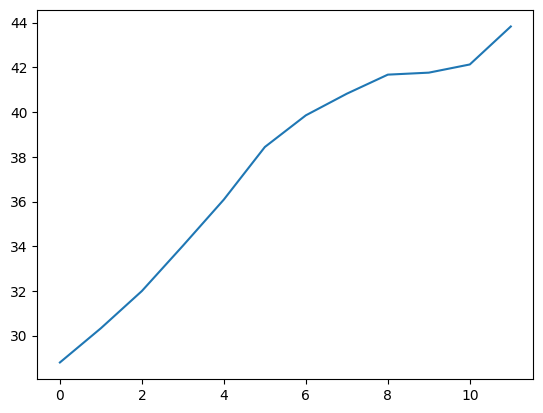

In [ ]:
df[df['country'] == 'Afghanistan']['lifeExp'].plot()

<Axes: title={'center': 'Boxplot'}, xlabel='year', ylabel='frequency'>

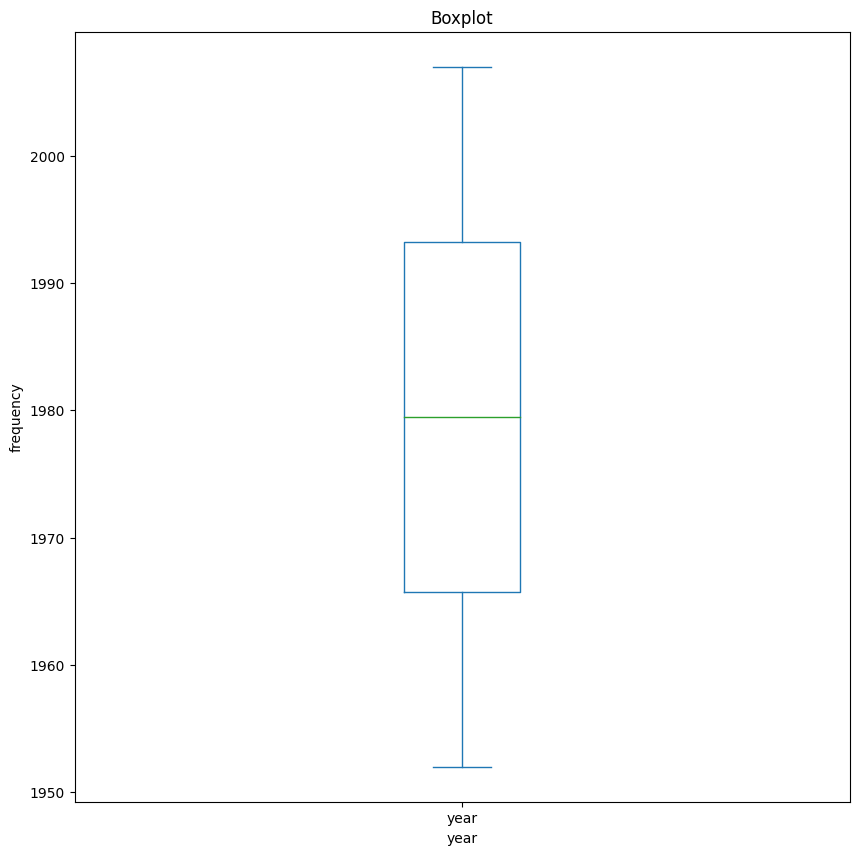

In [ ]:
df['year'].plot(
    kind = 'box',
    figsize = (10,10),
    xlabel = 'year',
    ylabel = 'frequency',
    title = 'Boxplot'
)

<Axes: >

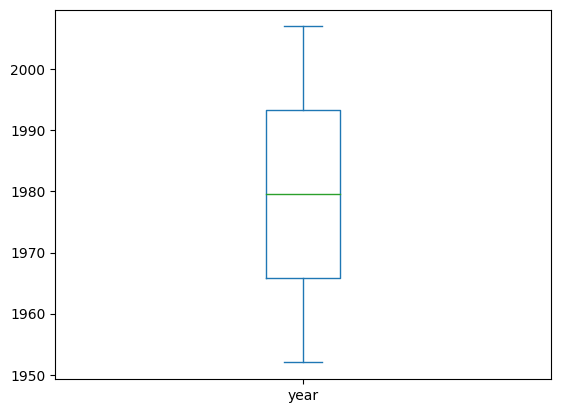

In [ ]:
df['year'].plot(kind='box')

Continent Representation
* One bar per continent
* Each bar shows the frequency

In [ ]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

<Axes: xlabel='continent'>

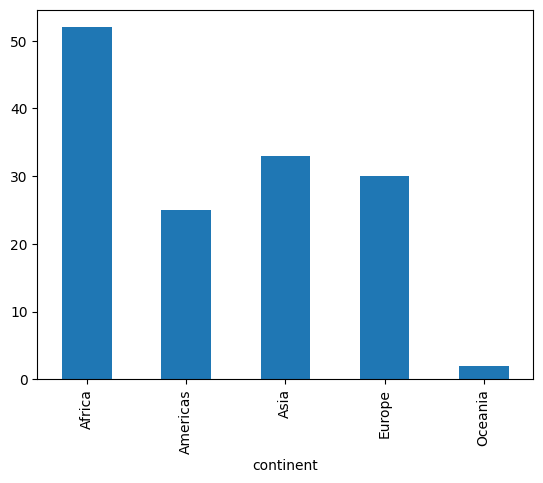

In [ ]:
df.groupby('continent')['country'].nunique().plot(kind='bar')

In [ ]:
 # boil it down to the plot

In [ ]:
df['continent']

0         Asia
1         Asia
2         Asia
3         Asia
4         Asia
         ...  
1699    Africa
1700    Africa
1701    Africa
1702    Africa
1703    Africa
Name: continent, Length: 1704, dtype: object

In [ ]:
df['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [ ]:
df[df['year']==2002]['continent'].value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64

<Axes: >

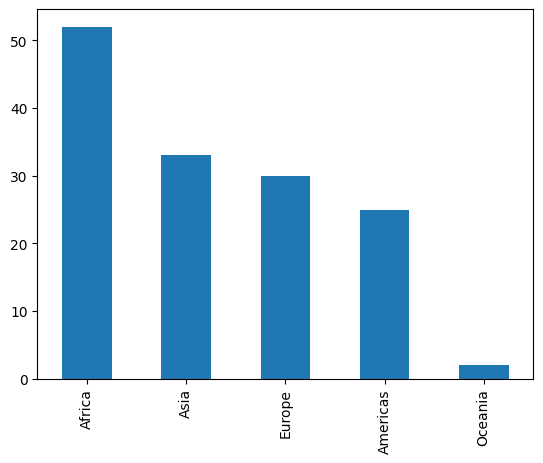

In [ ]:
df[df['year']==2002]['continent'].value_counts().plot(kind='bar')

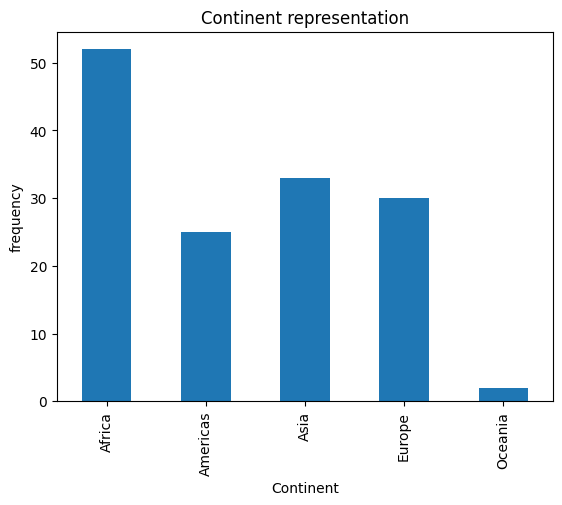

In [ ]:
df.groupby('continent')['country'].nunique().plot(
    kind='bar',
    title = 'Continent representation',
    xlabel = 'Continent',
    ylabel = 'frequency'
    )
plt.show()

In [ ]:
# frequency / Total countries
df.groupby('continent')['country'].nunique().sum()

142

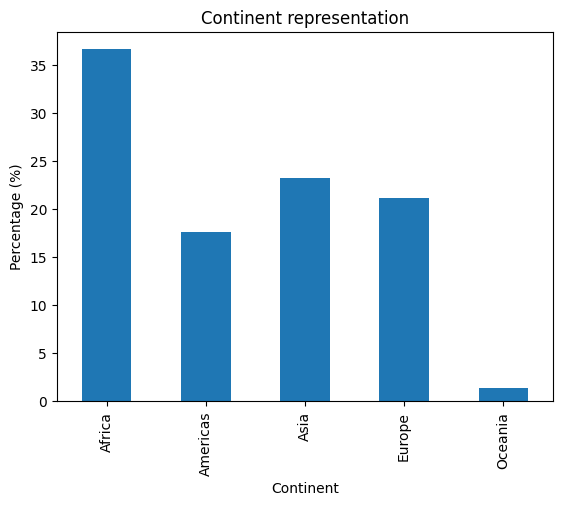

In [ ]:
total_countries = df['country'].nunique()
df_grouped = df.groupby('continent')['country'].nunique()
df_per = 100 * df_grouped / total_countries

df_per.plot(
    kind = 'bar',
    title = 'Continent representation',
    xlabel = 'Continent',
    ylabel = 'Percentage (%)'
)
plt.show()

How the Population / Life Expectancy / GDP of a country has changed over time ?
* x-axis = year
* y-axis = population

In [ ]:
country = 'Afghanistan'
col = 'pop'

df_country = df[df['country'] == country]
df_country

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


<Axes: title={'center': 'pop over the years'}, xlabel='year', ylabel='pop'>

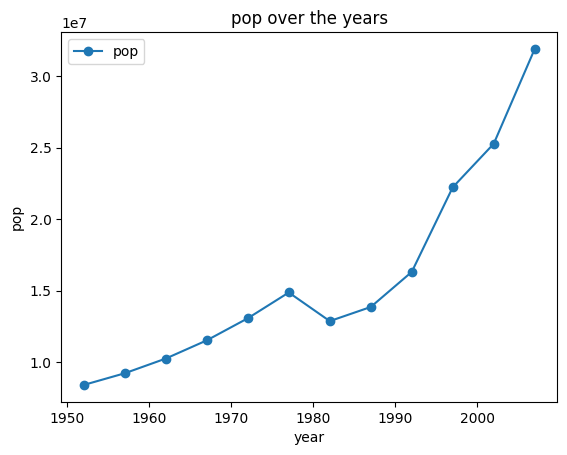

In [ ]:
df_country.plot(
    kind='line',
    title = f'{col} over the years',
    x = 'year',
    y = col,
    xlabel = 'year',
    ylabel = col,
    marker = 'o'
)

<Axes: title={'center': 'lifeExp over the years'}, xlabel='year', ylabel='lifeExp'>

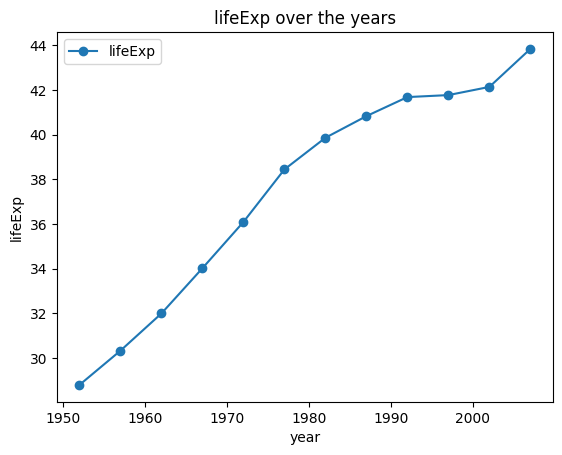

In [ ]:
country = 'Afghanistan'
col = 'lifeExp'

df_country = df[df['country'] == country]
df_country.plot(
    kind='line',
    title = f'{col} over the years',
    x = 'year',
    y = col,
    xlabel = 'year',
    ylabel = col,
    marker = 'o'
)

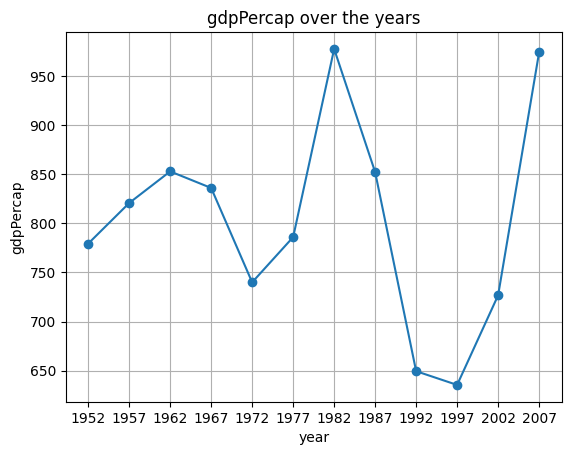

In [ ]:
country = 'Afghanistan'
col = 'gdpPercap'

df_country = df[df['country'] == country]
df_country.plot(
    kind='line',
    title = f'{col} over the years',
    x = 'year',
    y = col,
    xlabel = 'year',
    ylabel = col,
    marker = 'o',
    xticks =df['year'].unique(),
    legend = False,
    grid = True
)
plt.show()

How the Population / Life Expectancy / GDP changed globally over time ?

* Assume equal weights

In [ ]:
col = 'pop'
df.groupby('year')[col].mean()

year
1952    1.695040e+07
1957    1.876341e+07
1962    2.042101e+07
1967    2.265830e+07
1972    2.518998e+07
1977    2.767638e+07
1982    3.020730e+07
1987    3.303857e+07
1992    3.599092e+07
1997    3.883947e+07
2002    4.145759e+07
2007    4.402122e+07
Name: pop, dtype: float64

In [ ]:
type(df.groupby('year')[col].mean())

pandas.core.series.Series

In [ ]:
df['year']

0       1952
1       1957
2       1962
3       1967
4       1972
        ... 
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64

In [ ]:
type(df['year'])

pandas.core.series.Series

In [ ]:
df[['year']]

,year
0,1952
1,1957
2,1962
3,1967
4,1972
...,...
1699,1987
1700,1992
1701,1997
1702,2002


In [ ]:
type(df[['year']])

pandas.core.frame.DataFrame

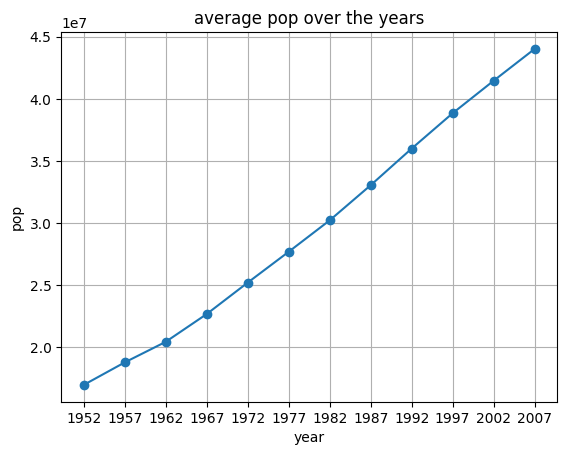

In [ ]:
col = 'pop'
df.groupby('year')[[col]].mean().plot(
    kind = 'line',
    marker = 'o',
    title = f'average {col} over the years',
    xlabel = 'year',
    ylabel = col,
    xticks = df['year'].unique(),
    grid = True,
    legend = False
)
plt.show()

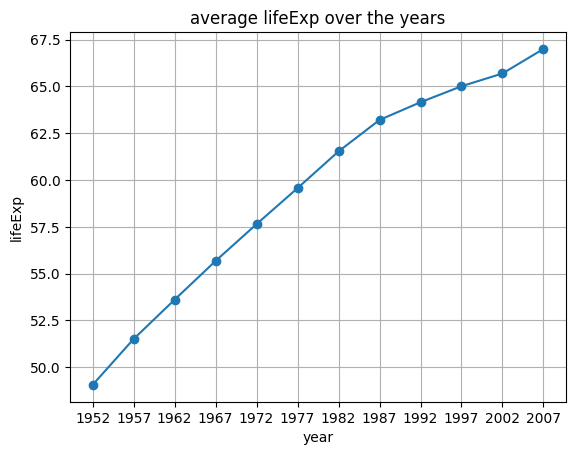

In [ ]:
col = 'lifeExp'
df.groupby('year')[[col]].mean().plot(
    kind = 'line',
    marker = 'o',
    title = f'average {col} over the years',
    xlabel = 'year',
    ylabel = col,
    xticks = df['year'].unique(),
    grid = True,
    legend = False
)
plt.show()

Which continent has the highest/lowest population/ lifeExp/ GDP?
* Aggerating Countries: Sum or Average
* Not ideal for actual analysis

In [ ]:
col = 'pop'
df.groupby('continent')[[col]].min()

,pop
continent,
Africa,60011.0
Americas,662850.0
Asia,120447.0
Europe,147962.0
Oceania,1994794.0


In [ ]:
col = 'pop'
df.groupby('continent')[[col]].min().min()

pop    60011.0
dtype: float64

In [ ]:
col = 'pop'
df.groupby('continent')[[col]].min().idxmin()

pop    Africa
dtype: object

In [ ]:
col = 'pop'
print(df.groupby('continent')[[col]].mean().idxmin())
print()
print(df.groupby('continent')[[col]].mean().idxmax())

pop    Oceania
dtype: object

pop    Asia
dtype: object


In [ ]:
col = 'gdpPercap'
print(df.groupby('continent')[[col]].mean().idxmin())
print()
print(df.groupby('continent')[[col]].mean().idxmax())

gdpPercap    Africa
dtype: object

gdpPercap    Oceania
dtype: object


Population Skew

In [ ]:
# Find the population skew in africa.
df[(df['continent']=='Africa') & (df['year']==2007)]['pop'].skew()

2.80071341532193

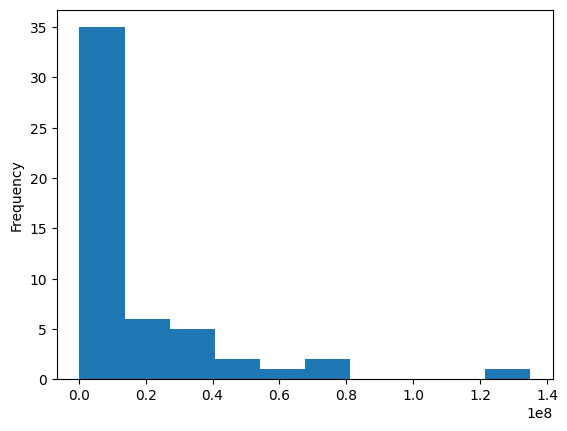

In [ ]:
df[(df['continent']=='Africa') & (df['year']==2007)]['pop'].plot(
    kind ='hist',
    bins = 10,
    y = 'pop'
)
plt.show()

In [ ]:
# Find the population skew in Europe.
df[(df['continent']=='Europe') & (df['year']==2007)]['pop'].skew()

1.527242769786779

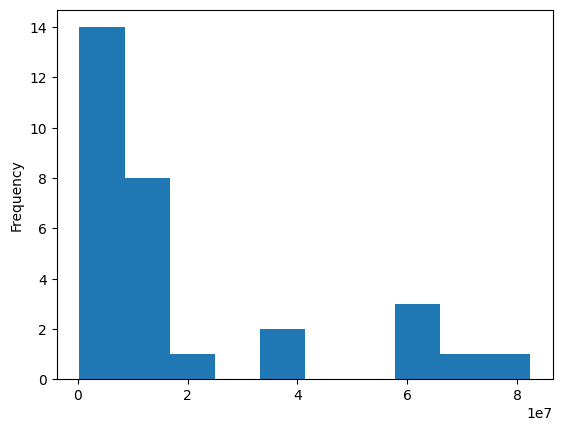

In [ ]:
df[(df['continent']=='Europe') & (df['year']==2007)]['pop'].plot(
    kind ='hist',
    bins = 10,
    y = 'pop'
)
plt.show()

Box Plot

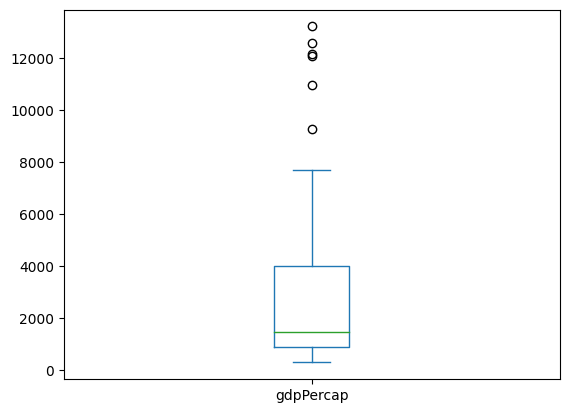

In [ ]:
continent = 'Africa'
col = 'gdpPercap'
df[(df['continent']==continent) & (df['year']==2007)].plot(
    kind ='box',
    y = col,
    grid = False,
    legend = False
)
plt.show()

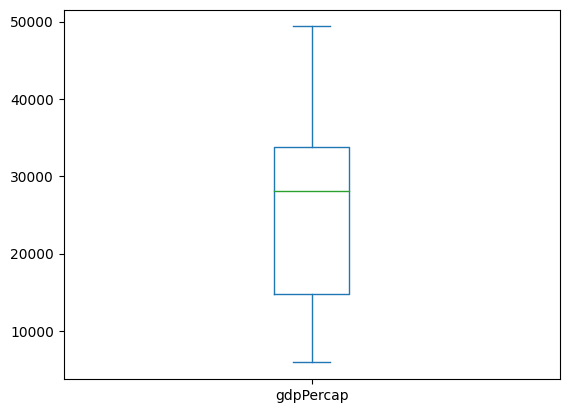

In [ ]:
continent = 'Europe'
col = 'gdpPercap'
df[(df['continent']==continent) & (df['year']==2007)].plot(
    kind ='box',
    y = col,
    grid = False,
    legend = False
)
plt.show()